## LIBRARIES IMPORT

In [2]:
## Importing Libraries
###Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory

###Image Processing Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import pickle
from PIL import Image
import cv2
import Augmentor

###Import other basic data processing libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pandas import Series

###Visualization
import matplotlib.pyplot as plt
import plotly
import nbformat
%matplotlib inline
import scikitplot as skplt

###Import system libraries

import os
from pathlib import Path
import logging, sys
import datetime
import time

## Filepath Label generator Function

In [3]:
def _FilepathLabelGenerator_Test(filepath):    
    filepathList=[]
    labelList=[]
    labels={}
    listedClass=os.listdir(filepath)
    for i in range(len(listedClass)):
        wrd=listedClass[i].split("_")
        j=0
        s=''
        while j<len(wrd):
            s=(s+wrd[j][0])
            j+=1
        labels.update({listedClass[i]:s.upper()})

    for class_ in listedClass:
            imagefolder = os.path.join(filepath,class_)
            image_paths = os.listdir(imagefolder)
            for imagepath in image_paths:
                filepathList.append(os.path.join(imagefolder,imagepath))
                labelList.append(labels.get(class_))
    return filepathList, labelList

In [4]:
##Function for Filepath and Labels
def _FilepathLabelGenerator_Trn(filepath):    
    filepathList=[]
    labelList=[]
    labels={}
    listedClass=os.listdir(filepath)
    for i in range(len(listedClass)):
        wrd=listedClass[i].split("_")
        j=0
        s=''
        while j<len(wrd):
            s=(s+wrd[j][0])
            j+=1
        labels.update({listedClass[i]:s.upper()})

    for class_ in listedClass:
            imagefolder = os.path.join(filepath,class_)
            image_paths = os.listdir(imagefolder+"\output")
            for imagepath in image_paths:
                filepathList.append(os.path.join(imagefolder+"\output",imagepath))
                labelList.append(labels.get(class_))
    return filepathList, labelList

## File path Generation (Edit ME)

In [5]:
rootpath = r'K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel2.3\Pap_Smear'

In [6]:
imagepath, labels = _FilepathLabelGenerator_Test(rootpath)
df_imgpath_label = pd.DataFrame({'imagepath':imagepath, 'label':labels})
df_imgpath_label

imagepath label
0    K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
1    K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
2    K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
3    K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
4    K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
..                                                 ...   ...
957  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC
958  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC
959  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC
960  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC
961  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC

[962 rows x 2 columns]

## Test Images Transfer Function

In [7]:
import shutil

def testImage_transfer(test_df,transferfolderpath):
    test_df = test_df.reset_index()
    for img_num in range(len(test_df)):
        f = test_df['imagepath'][img_num].split('\\')[-1]
        new_path=os.path.join(transferfolderpath,f)
        shutil.move(test_df['imagepath'][img_num], new_path)
        test_df['imagepath'][img_num]=new_path
    return test_df

## TRAIN TEST SPLIT FUNCTION (Run Only)

In [8]:
##Training and Test Split
ds_dum, ds_tst_Og = train_test_split(df_imgpath_label,  test_size= 0.2, shuffle= True, random_state= 31, stratify=df_imgpath_label['label'])
ds_tst_Og

imagepath label
113  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
99   K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
776  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
111  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
566  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
..                                                 ...   ...
255  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  LSIL
400  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
304  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
931  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC
6    K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL

[193 rows x 2 columns]

## TEST FILES TRANSFER

In [9]:
rootpath_test = r'K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel2.3\Test'

In [10]:
ds_tst_Og=testImage_transfer(ds_tst_Og,rootpath_test)
ds_tst_Og


C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3040331425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['imagepath'][img_num]=new_path
C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3040331425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['imagepath'][img_num]=new_path
C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3040331425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['imagepath'][i

index                                          imagepath label
0      113  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
1       99  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
2      776  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
3      111  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL
4      566  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
..     ...                                                ...   ...
188    255  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  LSIL
189    400  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
190    304  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   NEG
191    931  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...   SCC
192      6  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...  HSIL

[193 rows x 3 columns]

## AUGMENTATION FUNCTION

In [11]:
def Image_Oversample(path,sample_size):
    aug = Augmentor.Pipeline(path)
    aug.rotate(0.7,25,25)
    aug.flip_random(0.5)
    aug.skew(0.3)
    aug.crop_random(0.4,0.8)
    aug.sample(sample_size)

## IMAGE AUGMENTATIONS ON TRAIN SET ONLY

In [12]:
hsil_count = ds_dum[ds_dum['label']=='HSIL'].count()[1]
lsil_count = ds_dum[ds_dum['label']=='LSIL'].count()[1]
scc_count = ds_dum[ds_dum['label']=='SCC'].count()[1]
neg_count = ds_dum[ds_dum['label']=='NEG'].count()[1]
total = len(ds_dum)

print("The count of samples in each class is: \n\nHSIL:{}({}%) \n\nLSIL:{}({}%) \n\nSCC:{}({}%) \n\nNEG:{}({}%)".format(hsil_count,(round(hsil_count/total*100,2)),
lsil_count,(round(lsil_count/total*100,2)),
scc_count,(round(scc_count/total*100,2)),
neg_count,(round(neg_count/total*100,2))))

The count of samples in each class is: 

HSIL:130(16.91%) 

LSIL:91(11.83%) 

SCC:59(7.67%) 

NEG:489(63.59%)


In [13]:
list_foders=os.listdir(rootpath)
path_list=[]
for fold in list_foders:
    path_list.append(os.path.join(rootpath,fold))
    
hsil=path_list[0]
lsil=path_list[1]
neg=path_list[2]
scc=path_list[3]

In [14]:
req_datapoints=5000

In [15]:
Image_Oversample(hsil,round(req_datapoints/4))

Initialised with 130 image(s) found.
Output directory set to K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel2.3\Pap_Smear\High_squamous_intra-epithelial_lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x276C705A700>: 100%|█| 1250/1250 [02:37


In [16]:
Image_Oversample(scc,round(req_datapoints/4))

Initialised with 59 image(s) found.
Output directory set to K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel2.3\Pap_Smear\Squamous_cell_carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x276B0EBB2B0>: 100%|█| 1250/1250 [02:44<00:00,  7.61 Samp


In [17]:
Image_Oversample(lsil,round(req_datapoints/4))

Initialised with 91 image(s) found.
Output directory set to K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel2.3\Pap_Smear\Low_squamous_intra-epithelial_lesion\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x276AEB68D00>: 100%|█| 1250/1250 [02:36<00:00,  7.97 Samp


In [18]:
Image_Oversample(neg,round(req_datapoints/4))

Initialised with 489 image(s) found.
Output directory set to K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel2.3\Pap_Smear\N_E_G\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x276AEB35CD0>: 100%|█| 1250/1250 [02:35<00:00,  8.05 Samp


In [19]:
trn_img, trn_label = _FilepathLabelGenerator_Trn(rootpath)
data_train=pd.DataFrame({"train_imgpath":trn_img,"train_label":trn_label})

In [20]:
##Training and Validation Split
ds_trn, ds_val = train_test_split(data_train,  test_size= 0.25, shuffle= True, random_state= 42, stratify= data_train['train_label'])
ds_trn

train_imgpath train_label
423   K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        HSIL
4941  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...         SCC
771   K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        HSIL
1868  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        LSIL
3115  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...         NEG
...                                                 ...         ...
1400  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        LSIL
2791  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...         NEG
2391  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        LSIL
2480  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        LSIL
2227  K:\2023\NEU\IE7615_NNDL\NNDL_Project\BaseModel...        LSIL

[3750 rows x 2 columns]

In [21]:
ds_val, ds_tst = train_test_split(ds_val,  test_size= 0.4, shuffle= True, random_state= 42, stratify= ds_val['train_label'])

## DATA GENERATOR FUNCTION ImageDataGenerator (Run Only)

In [22]:
# Define the image size and input shape
image_height = 128
image_width = 128

# Define the batch size
batch_size = 64

image_size = (image_height, image_width)
input_shape = (image_height, image_width, 3)

In [23]:
# Create an instance of ImageDataGenerator for Training Set Only

datagen_trn = ImageDataGenerator(rescale=1./255)
                                 #horizontal_flip=True, 
                                 #vertical_flip=True)
                                 #height_shift_range=0.0,
                                 #rotation_range=180,
                                 #brightness_range=[0.5,1],
                                 #fill_mode='wrap',) 

ds_trn = datagen_trn.flow_from_dataframe(ds_trn,
                                     x_col='train_imgpath',  
                                     y_col='train_label', 
                                     target_size=image_size,  # Resize images to the specified size
                                     class_mode='categorical',  # For multi-class classification
                                     color_mode='rgb',  
                                     shuffle=False,  # Disable shuffling to maintain order
                                     batch_size=batch_size,
                                     keep_aspect_ratio=True)


Found 3750 validated image filenames belonging to 4 classes.


In [24]:
# Create a separate instance of ImageDataGenerator for Validation and Test Sets

datagen_tst = ImageDataGenerator(rescale=1./255)
                                 #height_shift_range=0.0,
                                 #rotation_range=180,
                                 #brightness_range=[0.5,1],
                                 #fill_mode='wrap',) 

#For Validation Set
ds_val=datagen_tst.flow_from_dataframe(ds_val,
                                     x_col='train_imgpath',  
                                     y_col='train_label', 
                                     target_size=image_size,  # Resize images to the specified size
                                     class_mode='categorical',  # For multi-class classification
                                     color_mode='rgb',  
                                     shuffle=True,  # Disable shuffling to maintain order
                                     batch_size=batch_size,
                                     keep_aspect_ratio=True)

Found 750 validated image filenames belonging to 4 classes.


In [25]:
ds_tst=datagen_tst.flow_from_dataframe(ds_tst,
                                     x_col='train_imgpath',  
                                     y_col='train_label', 
                                     target_size=image_size,  # Resize images to the specified size
                                     class_mode='categorical',  # For multi-class classification
                                     color_mode='rgb',  
                                     shuffle=False,  # Disable shuffling to maintain order
                                     batch_size=batch_size,
                                     keep_aspect_ratio=True)

Found 500 validated image filenames belonging to 4 classes.


In [26]:
ds_tst_Og=datagen_tst.flow_from_dataframe(ds_tst_Og,
                                     x_col='imagepath',  
                                     y_col='label', 
                                     target_size=image_size,  # Resize images to the specified size
                                     class_mode='categorical',  # For multi-class classification
                                     color_mode='rgb',  
                                     shuffle=False,  # Disable shuffling to maintain order
                                     batch_size=batch_size,
                                     keep_aspect_ratio=True)

Found 193 validated image filenames belonging to 4 classes.


## SHOW IMAGES FUNCTION (Run Only)

In [27]:
def show_sampleImages(data,batchsize=25):
    # return classes , images to be displayed
    # data.class_indices is a dictionary
    classes = list(data.class_indices.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(data)        # get a batch size samples from the datagenerator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, batchsize)    # check if sample less than 25 images

    plt.figure(figsize= (round(batchsize*2), round(batchsize*2)))
    m=0
    b=batchsize
    while b>1:
        m+=1
        b=b/2

    for i in range(sample):
        plt.subplot(m, m, i + 1)
        image = images[i] 
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= m*6)
        plt.axis('off')
    
    plt.show()

## CALLBACK FUNCTION (Run Only)

In [28]:
# Define CallBack
class FinalCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\n****************\n\nThe average loss for epoch {} is{:7.3f} and accuracy is{:7.3f}.".format(epoch+1, logs["loss"], logs["accuracy"]),
              "\n\n***************\n")

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                 mode='max', 
                                                 min_delta = 0.01, 
                                                 baseline = 0.5, 
                                                 patience = 10, 
                                                 restore_best_weights = True)

## CONFUSION MATRIX (Run Only)

In [29]:
##Unnormalized and Normalized Confusion Matric Plots

def confusion_matrix_num(model, data):
    preds = model.predict_generator(data)
    y_pred = np.argmax(preds, axis = 1)

    temp_dict = {0: 'HSIL', 1: 'LSIL', 2: 'NEG', 3: 'SCC'}

    y_p = [temp_dict[k] for k in y_pred]  
    y_t = [temp_dict[k] for k in data.classes]

    skplt.metrics.plot_confusion_matrix(y_t, 
                                        y_p,
                                        normalize = False,
                                        title = "Count-wise Confusion Matrix",
                                        figsize = (10, 10))
    
def confusion_matrix_norm(model, data):
    preds = model.predict_generator(data)
    y_pred = np.argmax(preds, axis = 1)

    temp_dict = {0: 'HSIL', 1: 'LSIL', 2: 'NEG', 3: 'SCC'}


    y_p = [temp_dict[k] for k in y_pred]  
    y_t = [temp_dict[k] for k in data.classes]

    skplt.metrics.plot_confusion_matrix(y_t, 
                                        y_p,
                                        normalize = True,
                                        title = "Normalized Confusion Matrix",
                                        figsize = (10, 10))

## PLOTTING DURING EPOCHS (Run Only)

In [30]:
def plot_training(hist):
    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'orange', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'steelblue', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'orange', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'steelblue', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

## Checking Images

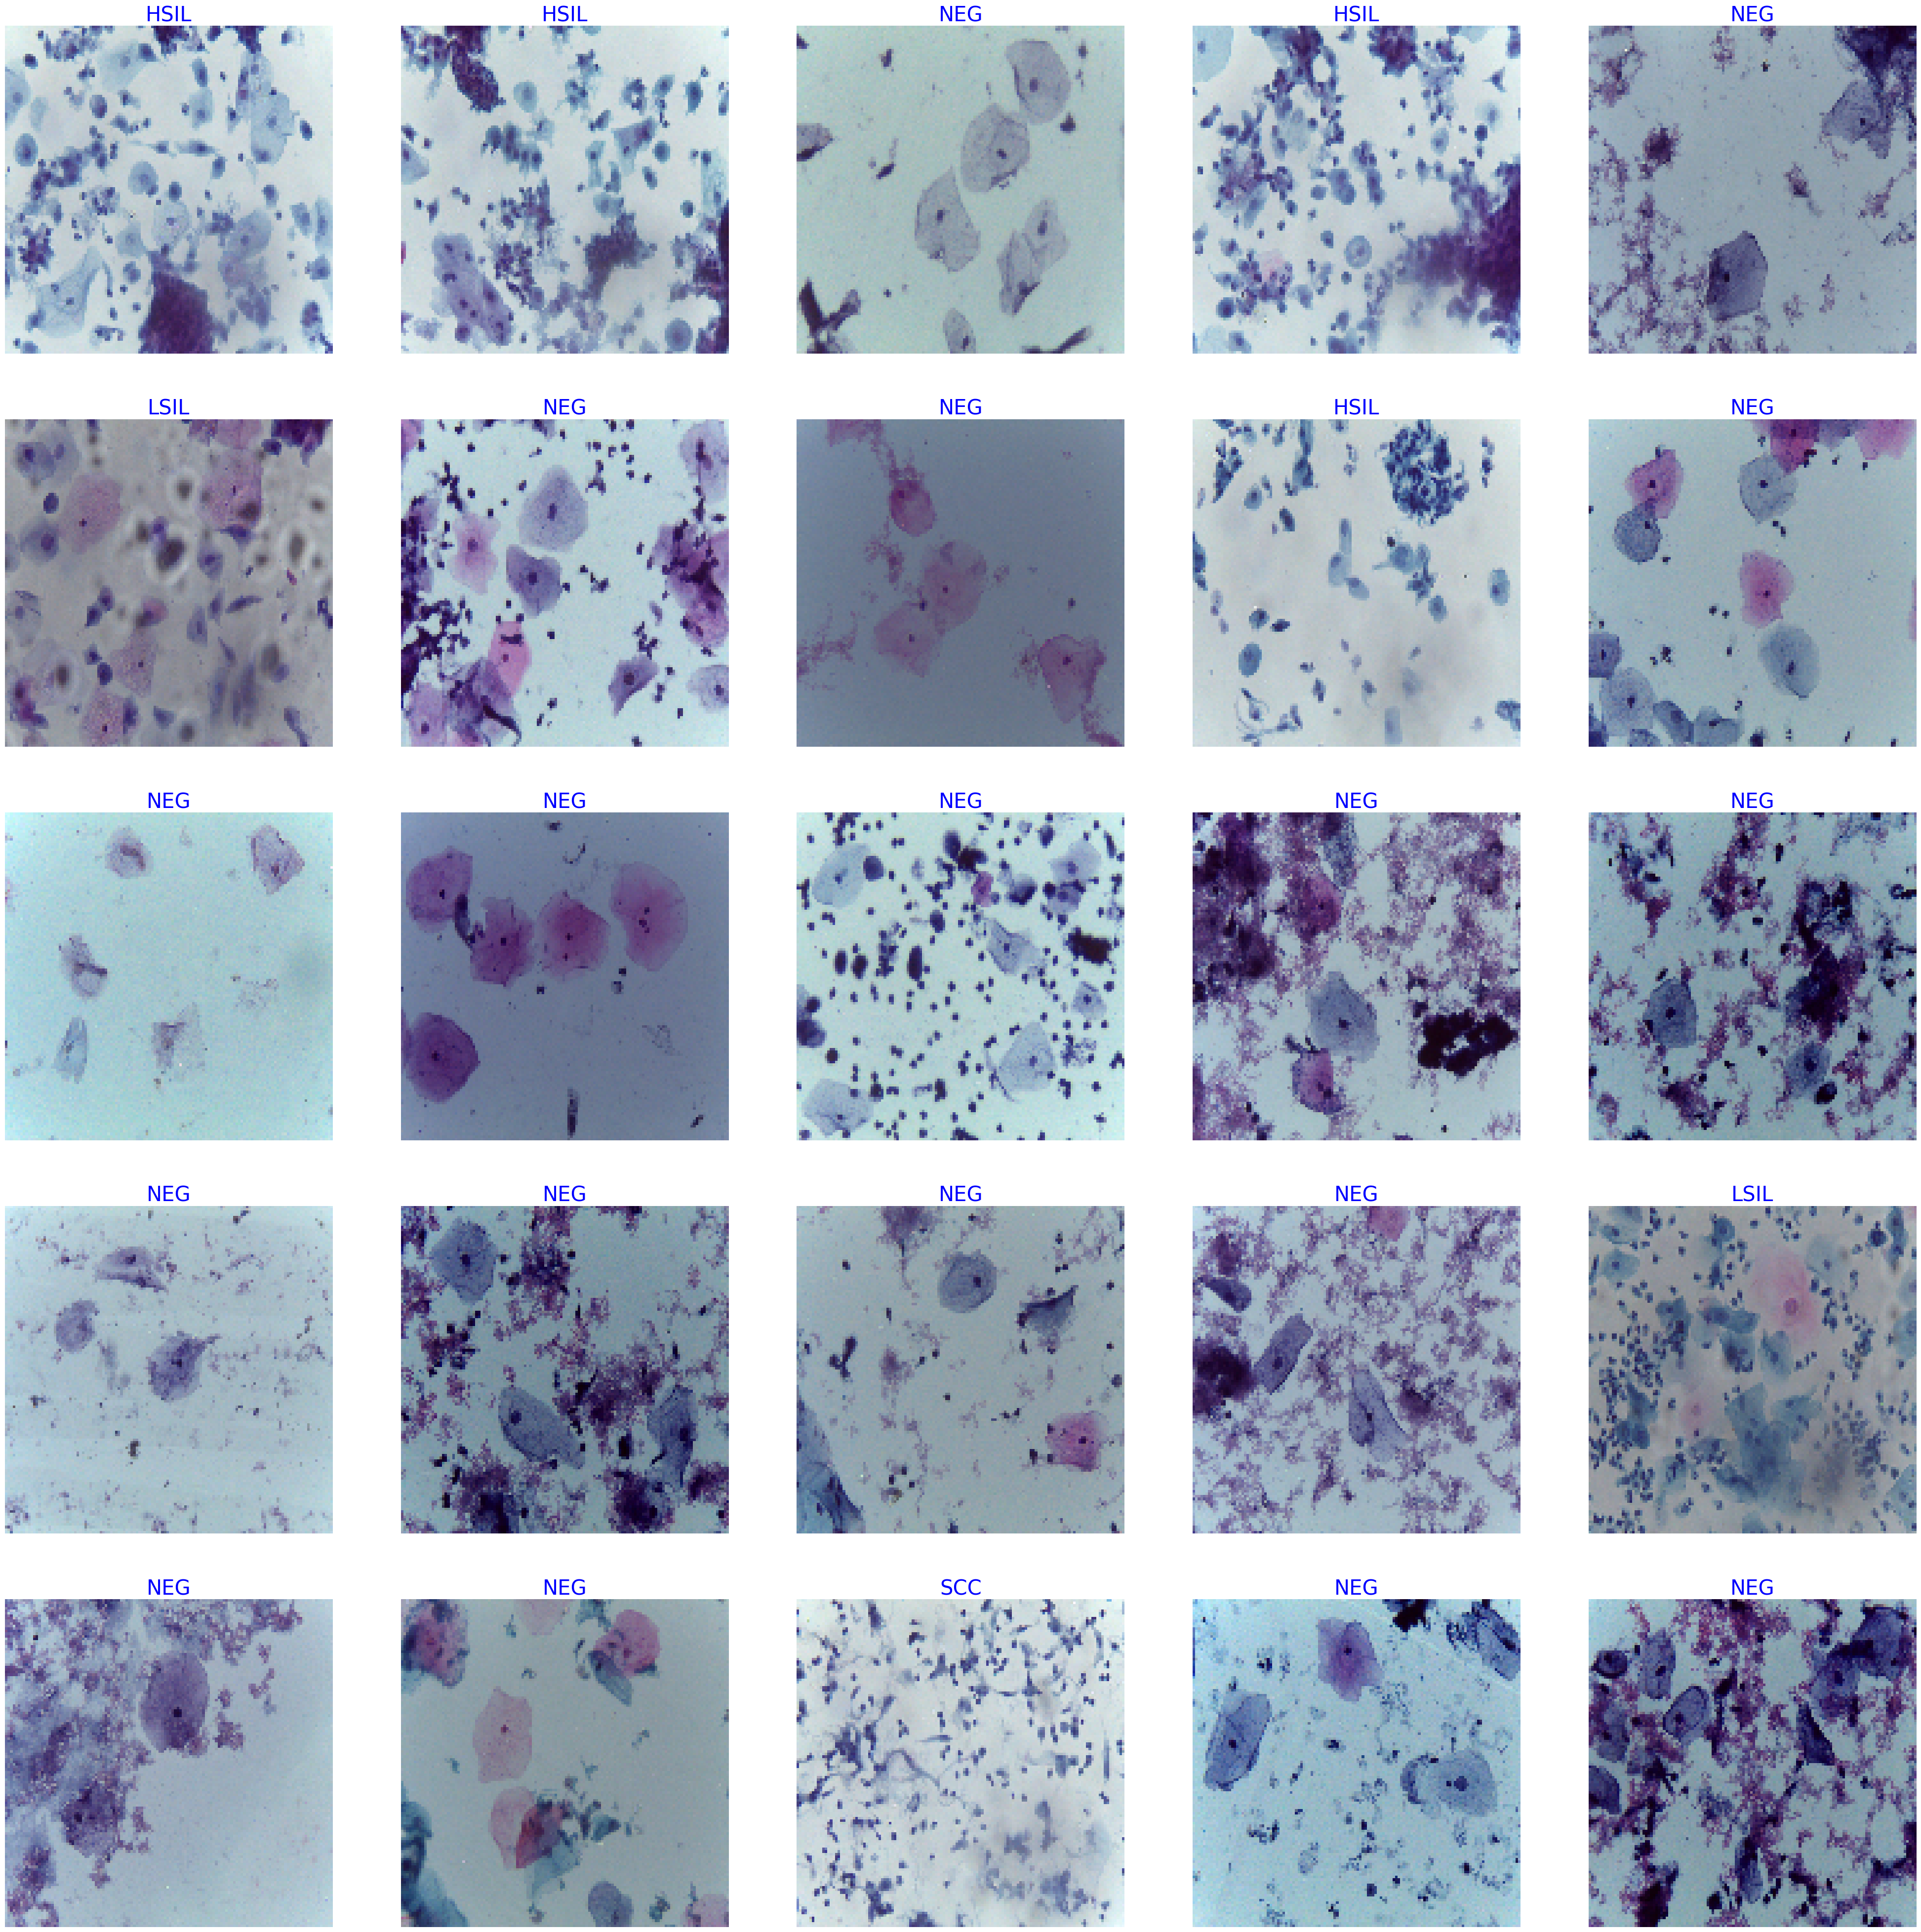

In [32]:
show_sampleImages(ds_tst_Og)

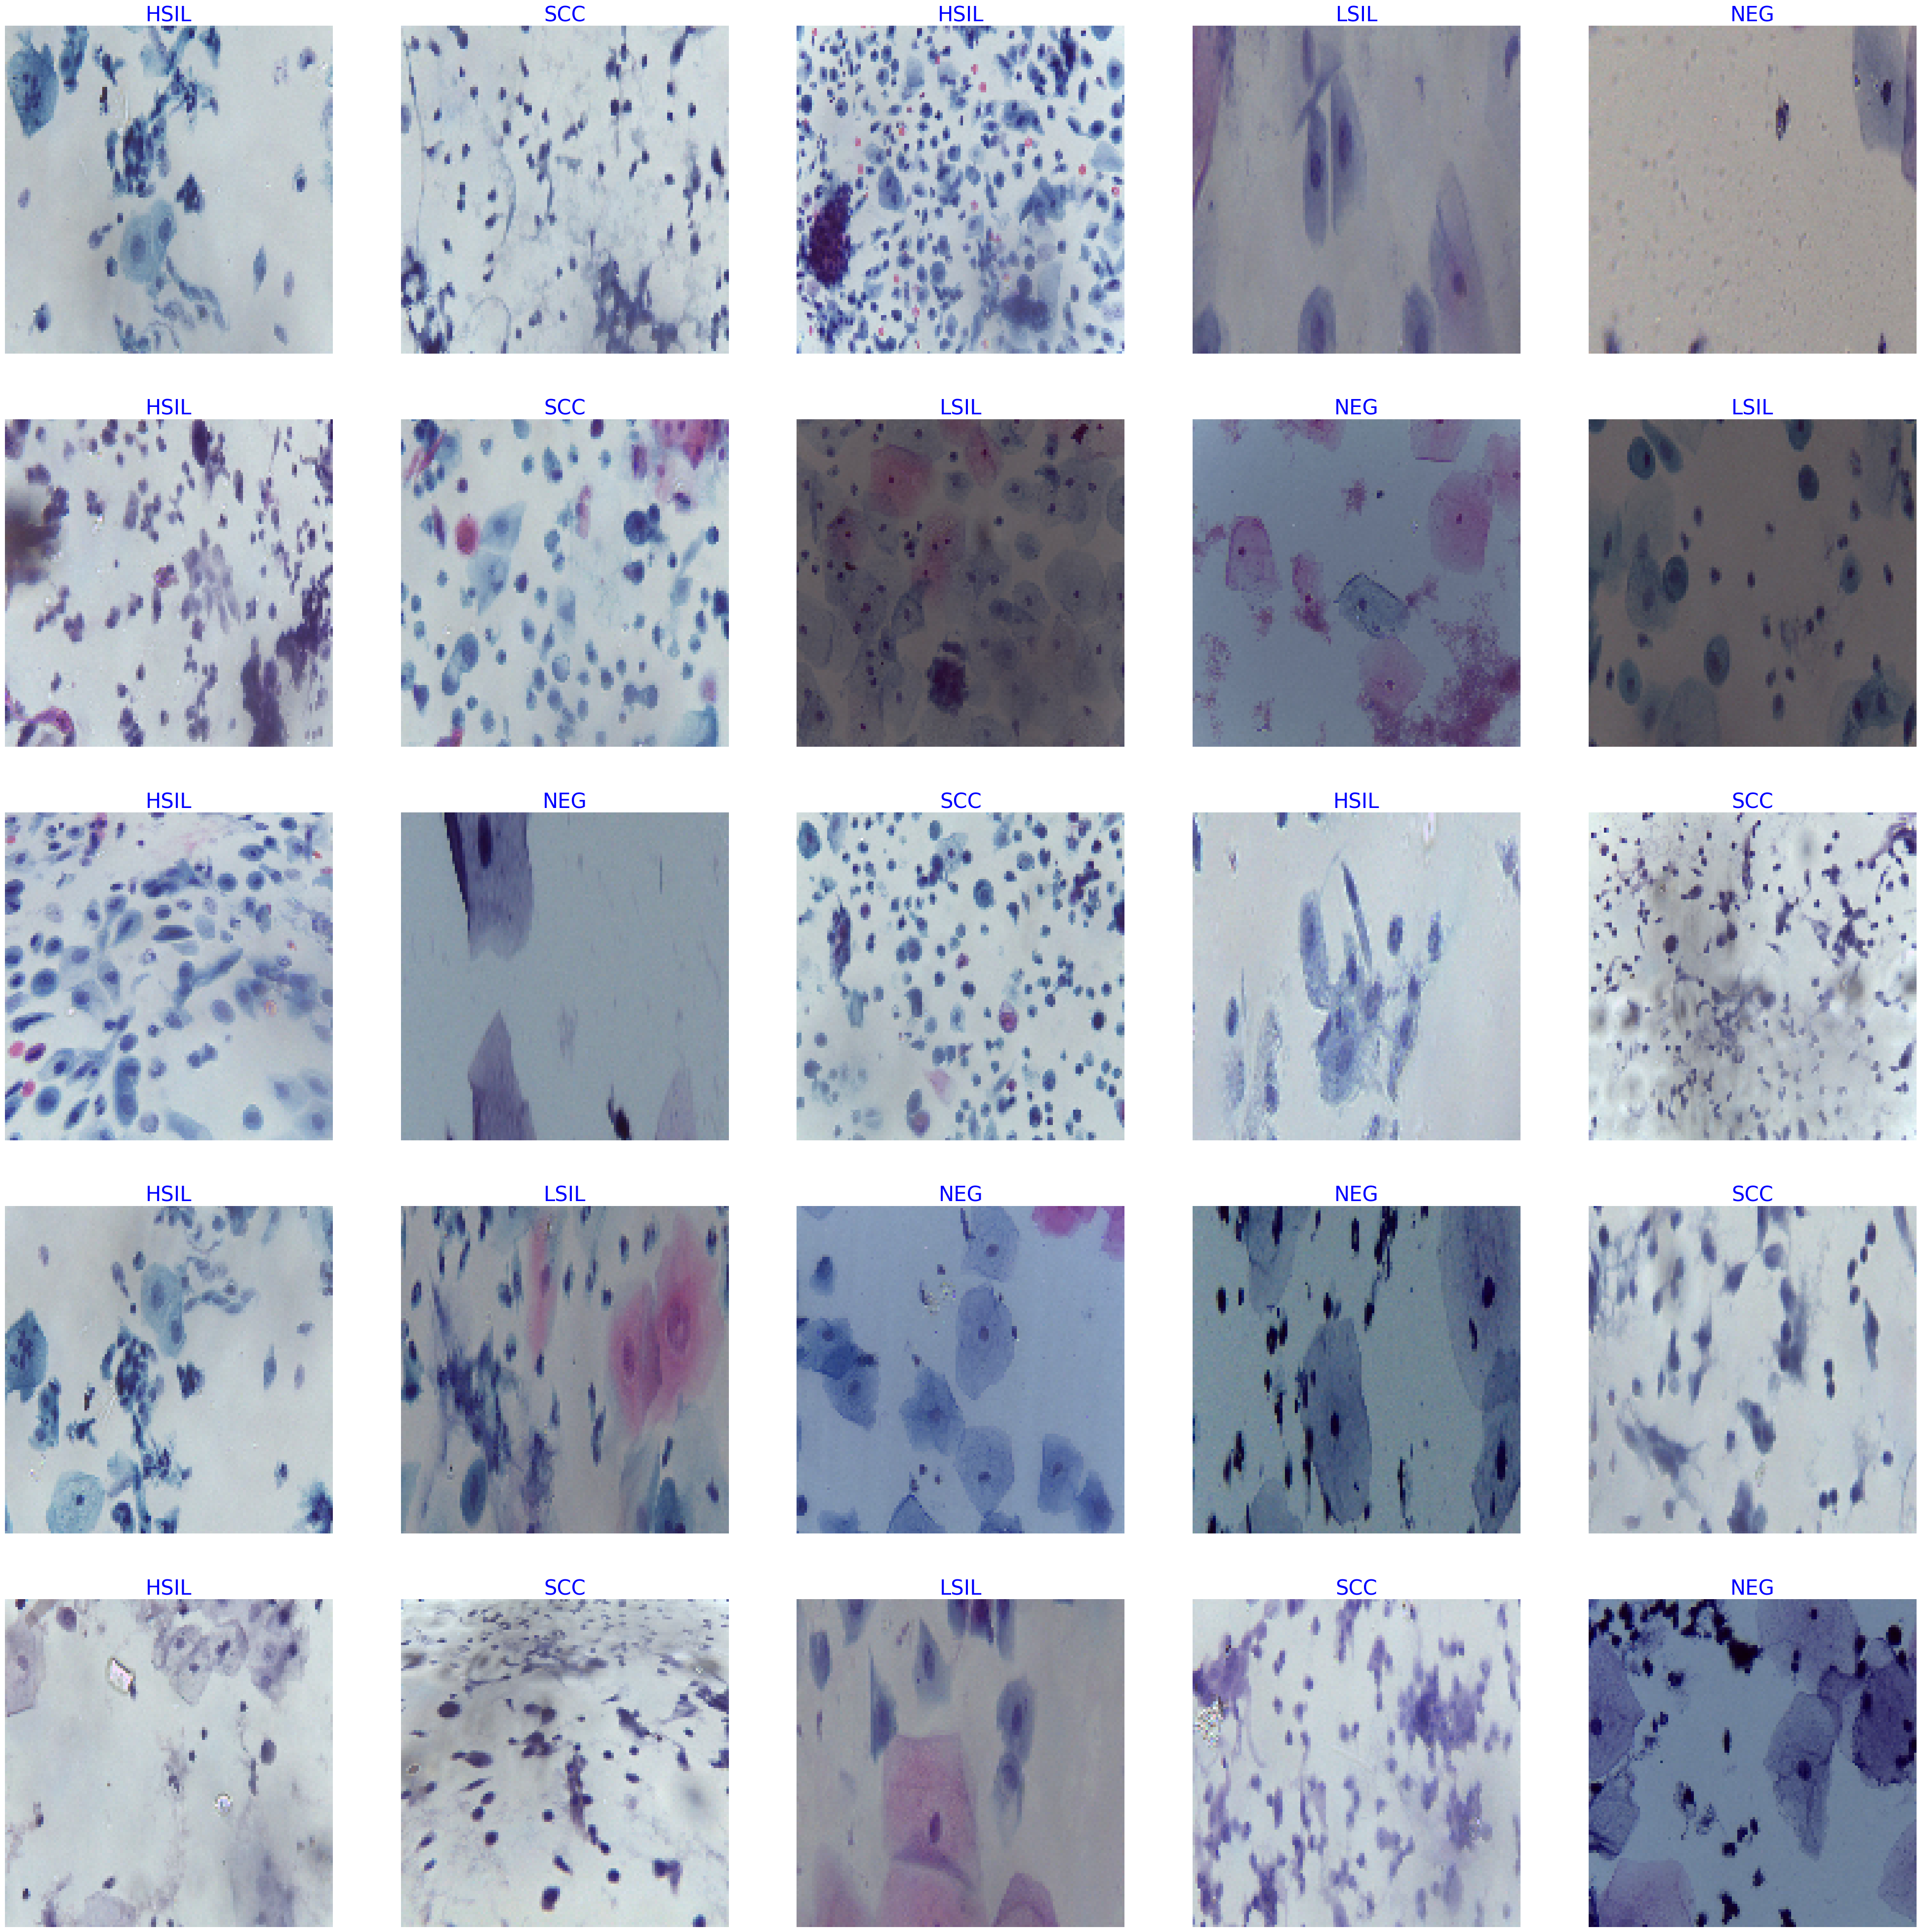

In [34]:
show_sampleImages(ds_trn)

# MODEL

In [41]:
# Create the Sequential model with modified architecture
CNN_H2 = tf.keras.Sequential([
    #for equal regularization
    tf.keras.layers.SeparableConv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="tanh", input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides = (1,1), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    tf.keras.layers.SpatialDropout2D(rate=0.1),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides = (1,1), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='elu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
], name='CNNModel')

# Compile the model with the modified optimizer
#sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
CNN_H2.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

CNN_H2.summary()

Model: "CNNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_6 (Separab  (None, 126, 126, 32)     155       
 leConv2D)                                                       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_7 (Separab  (None, 30, 30, 128)      8896      
 leConv2D)                                                

In [42]:
results_H2 = CNN_H2.fit(ds_trn,
                  epochs=50, 
                  batch_size = 64, 
                  verbose= 1, 
                  callbacks=[FinalCallBack(), EarlyStopping],
                  validation_data= ds_val)

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 1.2829 - accuracy: 0.3752
****************

The average loss for epoch 1 is  1.283 and accuracy is  0.375. 

***************

59/59 [==============================] - 160s 3s/step - loss: 1.2829 - accuracy: 0.3752 - val_loss: 1.1103 - val_accuracy: 0.3947
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 0.9645 - accuracy: 0.5512
****************

The average loss for epoch 2 is  0.965 and accuracy is  0.551. 

***************

59/59 [==============================] - 102s 2s/step - loss: 0.9645 - accuracy: 0.5512 - val_loss: 0.6817 - val_accuracy: 0.6893
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 0.8066 - accuracy: 0.6368
****************

The average loss for epoch 3 is  0.807 and accuracy is  0.637. 

***************

59/59 [==============================] - 101s 2s/step - loss: 0.8066 - accuracy: 0.6368 - val_loss: 0.7002 - val_accuracy: 0.6947
Epoch 4/50
59/59 [==========

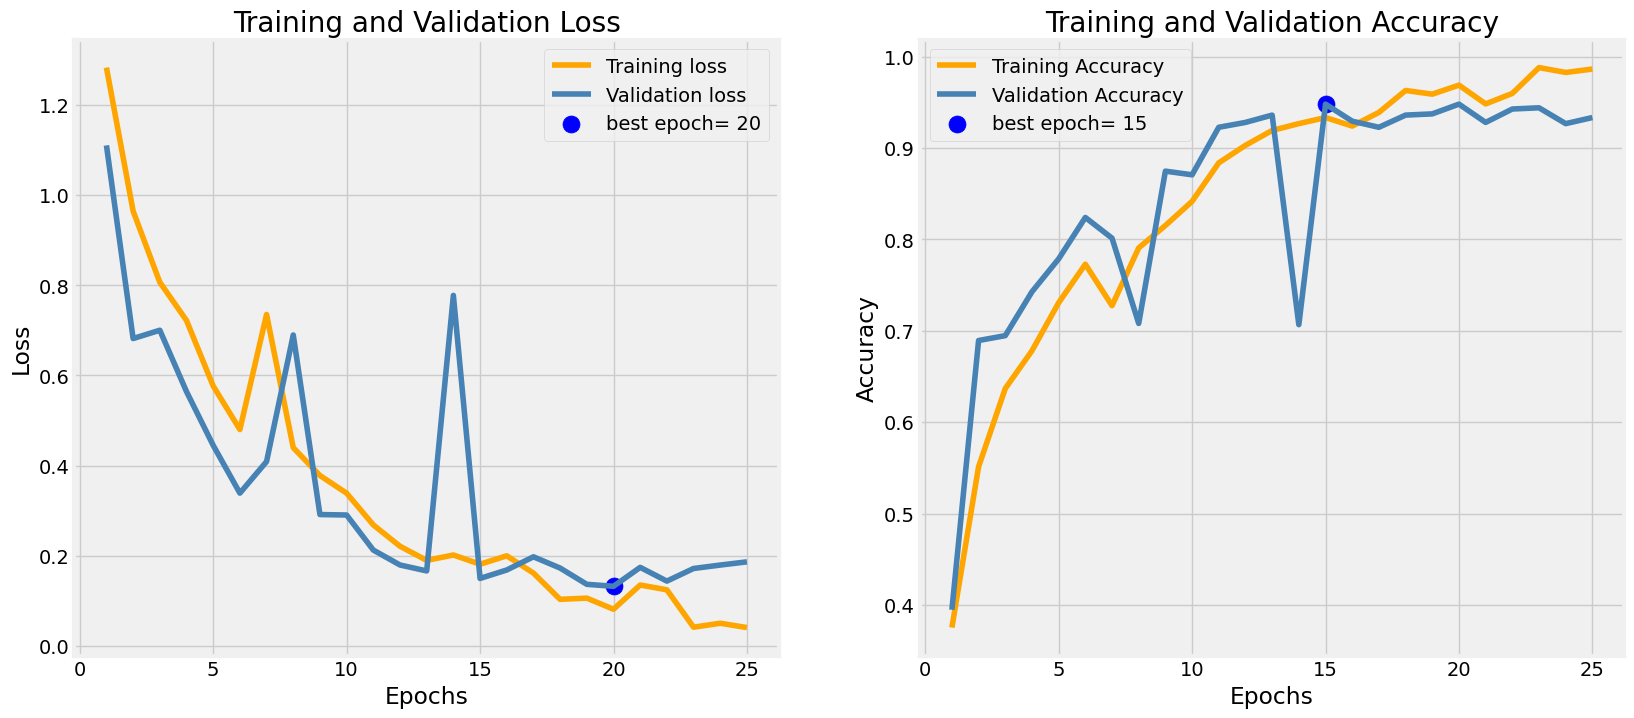

In [43]:
plot_training(results_H2)

In [44]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_H2.evaluate(ds_tst)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for the test data
y_pred = CNN_H2.predict(ds_tst)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ds_trn.class_indices.keys()
print(classification_report(ds_tst.classes, y_pred_classes, target_names=class_names))

8/8 [==============================] - 14s 2s/step - loss: 0.1961 - accuracy: 0.9160
Test Accuracy: 91.60%
              precision    recall  f1-score   support

        HSIL       0.78      0.94      0.86       125
        LSIL       0.99      1.00      1.00       125
         NEG       1.00      0.97      0.98       125
         SCC       0.92      0.75      0.83       125

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [47]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_H2.evaluate(ds_tst_Og)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for the test dataz
y_pred = CNN_H2.predict(ds_tst_Og)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ds_trn.class_indices.keys()
print(classification_report(ds_tst_Og.classes, y_pred_classes, target_names=class_names))

4/4 [==============================] - 13s 3s/step - loss: 0.1207 - accuracy: 0.9637
Test Accuracy: 96.37%
              precision    recall  f1-score   support

        HSIL       0.91      0.91      0.91        33
        LSIL       0.96      1.00      0.98        22
         NEG       1.00      0.99      1.00       123
         SCC       0.80      0.80      0.80        15

    accuracy                           0.96       193
   macro avg       0.92      0.93      0.92       193
weighted avg       0.96      0.96      0.96       193



C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


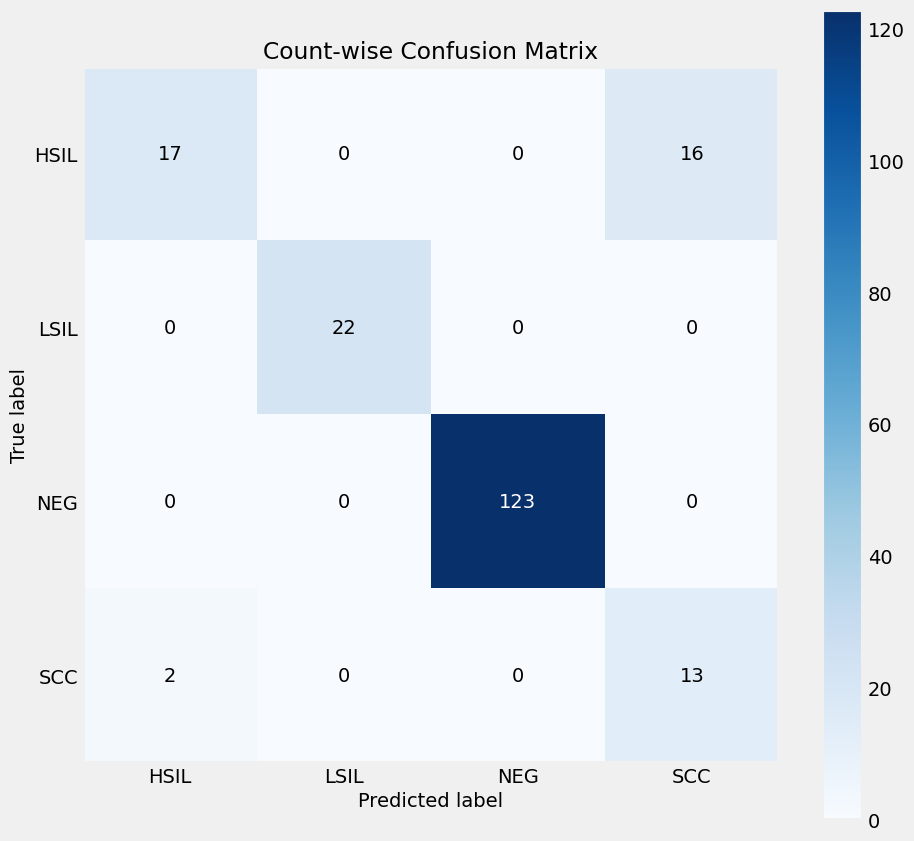

In [168]:
confusion_matrix_num(CNN_H2, ds_tst_Og)

C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


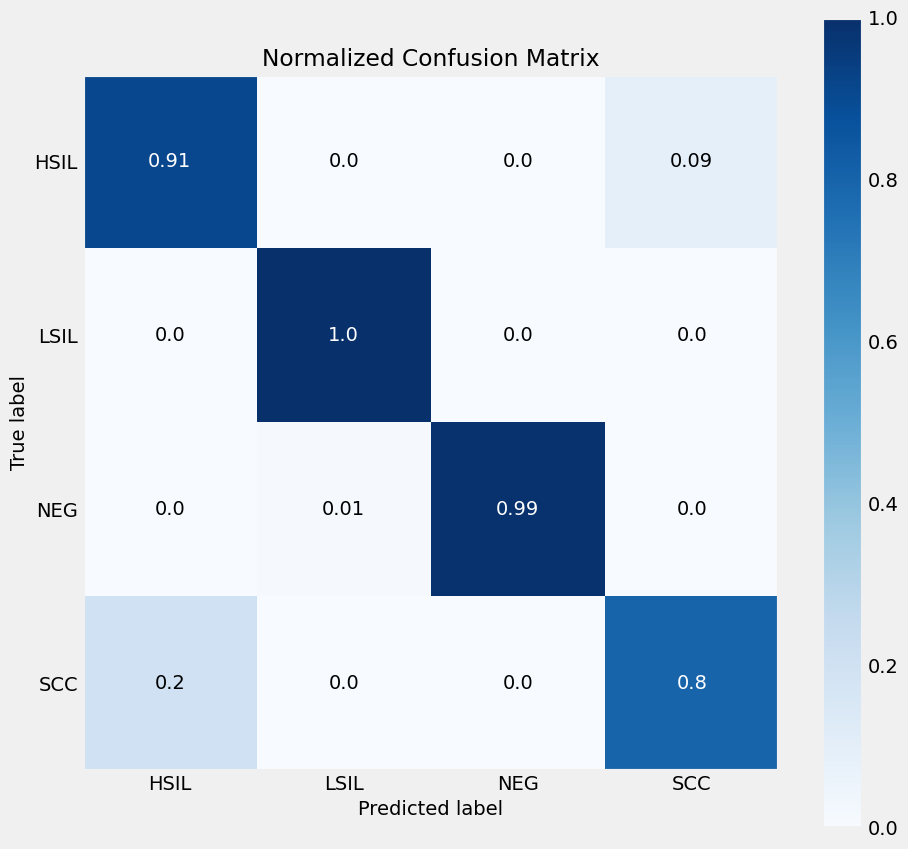

In [48]:
confusion_matrix_norm(CNN_H2, ds_tst_Og)

In [49]:
CNN_A1 = tf.keras.Sequential([
    #for equal regularization
    tf.keras.layers.SeparableConv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="tanh", input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides = (1,1), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    tf.keras.layers.SpatialDropout2D(rate=0.1),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides = (1,1), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='elu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
], name='CNNModel')

# Compile the model with the modified optimizer
#sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
CNN_A1.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

CNN_A1.summary()

Model: "CNNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_8 (Separab  (None, 126, 126, 64)     283       
 leConv2D)                                                       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 spatial_dropout2d_5 (Spatia  (None, 32, 32, 128)      0         
 lDropout2D)                                              

In [51]:
results_A1 = CNN_A1.fit(ds_trn,
                  epochs=50, 
                  batch_size = 64, 
                  verbose= 1, 
                  callbacks=[FinalCallBack(), EarlyStopping],
                  validation_data= ds_val)

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 1.3436 - accuracy: 0.3525
****************

The average loss for epoch 1 is  1.344 and accuracy is  0.353. 

***************

59/59 [==============================] - 103s 2s/step - loss: 1.3436 - accuracy: 0.3525 - val_loss: 0.9143 - val_accuracy: 0.6547
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 0.8166 - accuracy: 0.6283
****************

The average loss for epoch 2 is  0.817 and accuracy is  0.628. 

***************

59/59 [==============================] - 102s 2s/step - loss: 0.8166 - accuracy: 0.6283 - val_loss: 0.5663 - val_accuracy: 0.7467
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.6904
****************

The average loss for epoch 3 is  0.636 and accuracy is  0.690. 

***************

59/59 [==============================] - 100s 2s/step - loss: 0.6363 - accuracy: 0.6904 - val_loss: 0.5407 - val_accuracy: 0.7493
Epoch 4/50
59/59 [==========

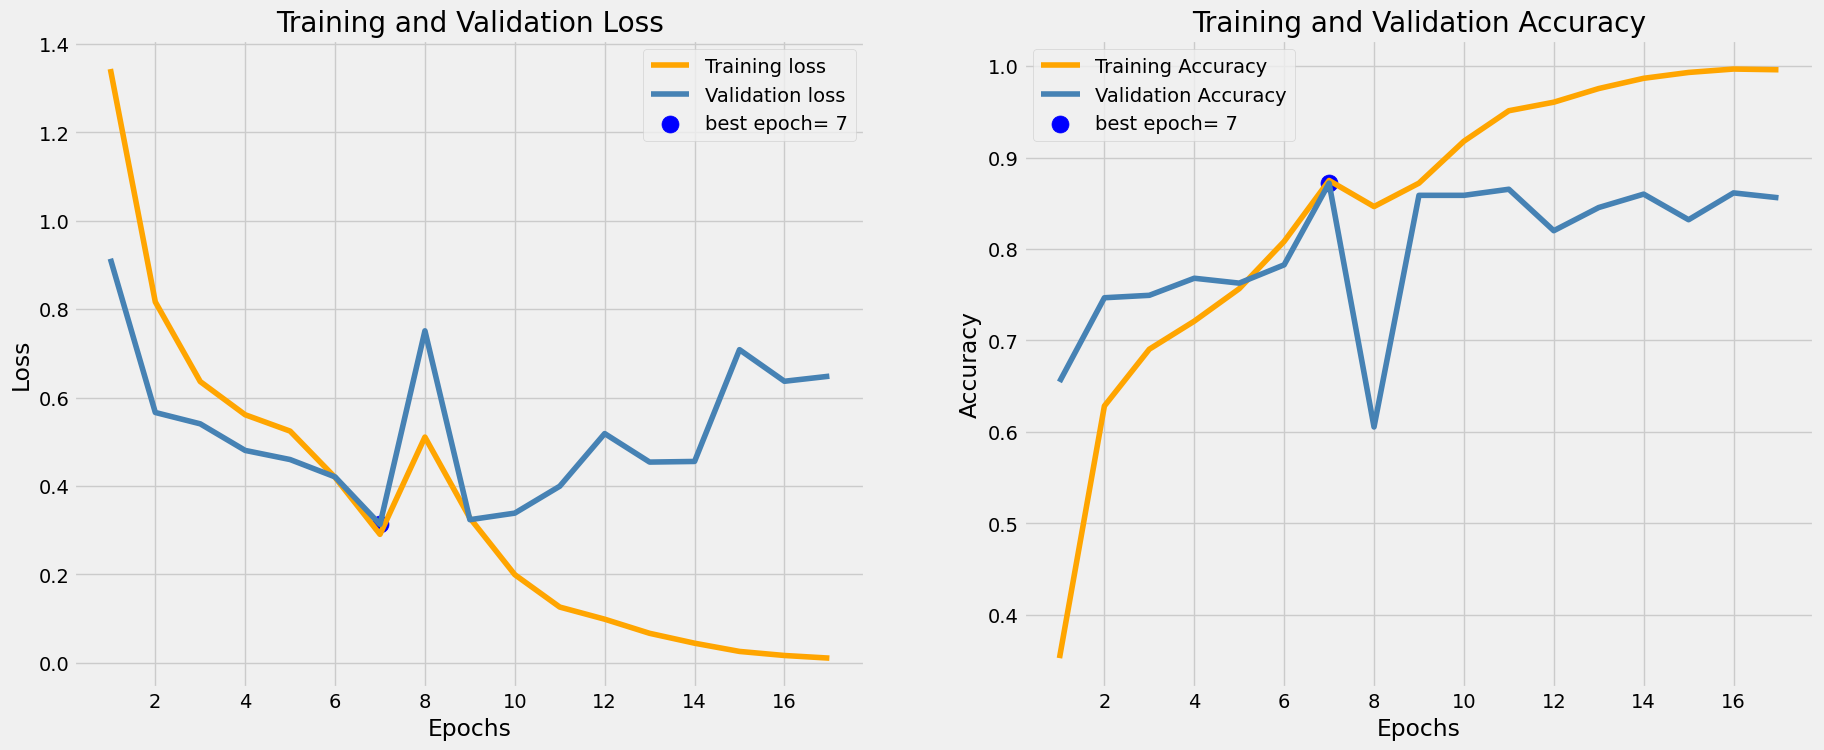

In [52]:
plot_training(results_sniA1)

In [83]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_A1.evaluate(ds_tst_Og)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for the test data
y_pred = CNN_A1.predict(ds_tst_Og)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ds_trn.class_indices.keys()
print(classification_report(ds_tst_Og.classes, y_pred_classes, target_names=class_names))

4/4 [==============================] - 12s 3s/step - loss: 0.2863 - accuracy: 0.8808
Test Accuracy: 88.08%
              precision    recall  f1-score   support

        HSIL       0.77      0.73      0.75        33
        LSIL       0.81      1.00      0.90        22
         NEG       1.00      0.89      0.94       123
         SCC       0.56      0.93      0.70        15

    accuracy                           0.88       193
   macro avg       0.79      0.89      0.82       193
weighted avg       0.91      0.88      0.89       193



C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


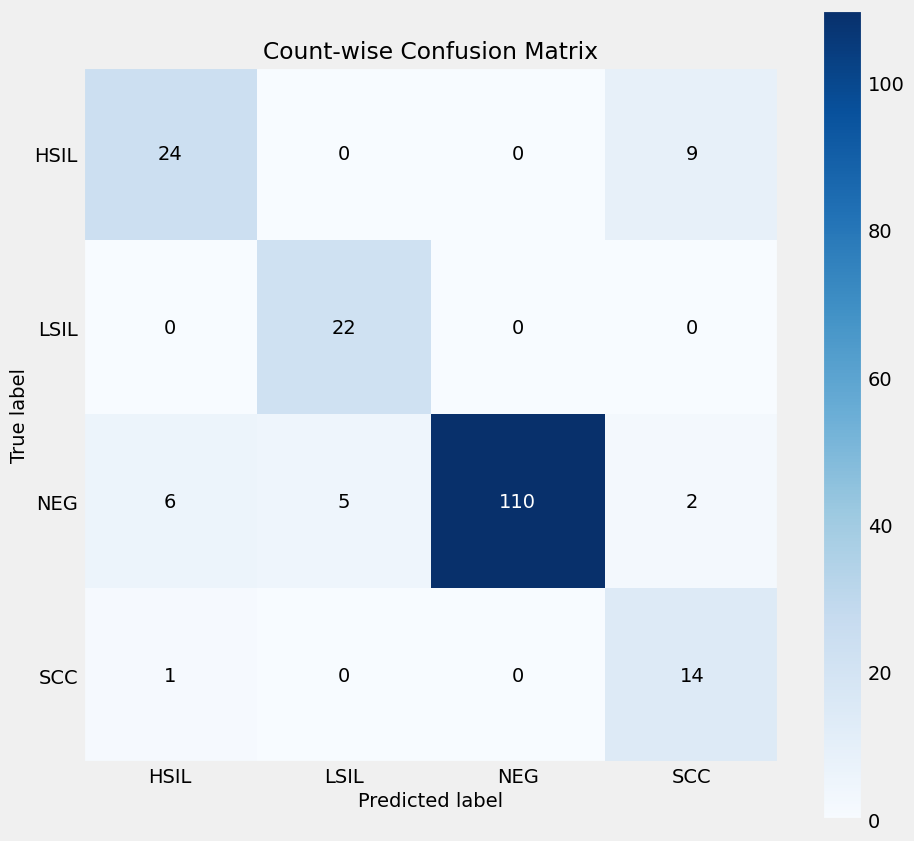

In [84]:
confusion_matrix_num(CNN_A1, ds_tst_Og)

## H2 with Batch Normalization

In [64]:
CNN_H2N = tf.keras.Sequential([
    #for equal regularization
    tf.keras.layers.SeparableConv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="tanh", input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides = (1,1), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    BatchNormalization(),
    tf.keras.layers.SpatialDropout2D(rate=0.1),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides = (1,1), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='elu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(4, activation='softmax')
], name='CNNModel')

# Compile the model with the modified optimizer
#sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
CNN_H2N.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

CNN_H2N.summary()

Model: "CNNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_15 (Separa  (None, 126, 126, 32)     155       
 bleConv2D)                                                      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                     

In [65]:
results_H2N = CNN_H2N.fit(ds_trn,
                  epochs=50, 
                  batch_size = 64, 
                  verbose= 1, 
                  callbacks=[FinalCallBack(), EarlyStopping],
                  validation_data= ds_val)

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 0.3710 - accuracy: 0.8611
****************

The average loss for epoch 1 is  0.371 and accuracy is  0.861. 

***************

59/59 [==============================] - 104s 2s/step - loss: 0.3710 - accuracy: 0.8611 - val_loss: 2.8510 - val_accuracy: 0.2507
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9472
****************

The average loss for epoch 2 is  0.146 and accuracy is  0.947. 

***************

59/59 [==============================] - 100s 2s/step - loss: 0.1457 - accuracy: 0.9472 - val_loss: 3.2785 - val_accuracy: 0.2507
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 0.0953 - accuracy: 0.9709
****************

The average loss for epoch 3 is  0.095 and accuracy is  0.971. 

***************

59/59 [==============================] - 101s 2s/step - loss: 0.0953 - accuracy: 0.9709 - val_loss: 3.4107 - val_accuracy: 0.2507
Epoch 4/50
59/59 [==========

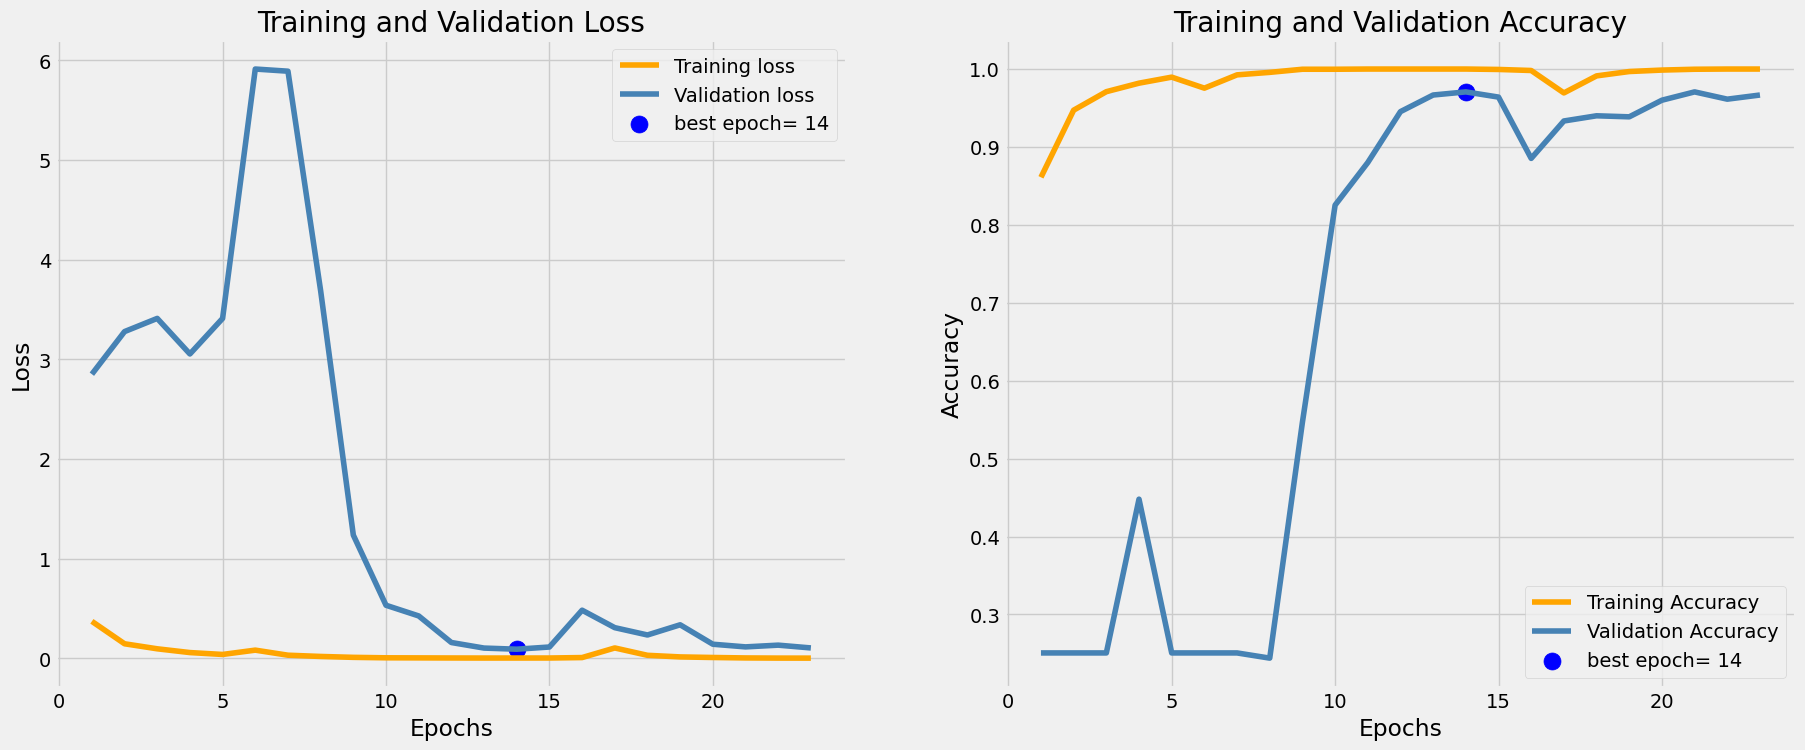

In [67]:
plot_training(results_H2N)

In [69]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_H2N.evaluate(ds_tst_Og)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for the test data
y_pred = CNN_H2N.predict(ds_tst_Og)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ds_trn.class_indices.keys()
print(classification_report(ds_tst_Og.classes, y_pred_classes, target_names=class_names))

4/4 [==============================] - 11s 3s/step - loss: 0.0585 - accuracy: 0.9845
Test Accuracy: 98.45%
              precision    recall  f1-score   support

        HSIL       0.97      0.94      0.95        33
        LSIL       1.00      1.00      1.00        22
         NEG       1.00      1.00      1.00       123
         SCC       0.88      0.93      0.90        15

    accuracy                           0.98       193
   macro avg       0.96      0.97      0.96       193
weighted avg       0.98      0.98      0.98       193



C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


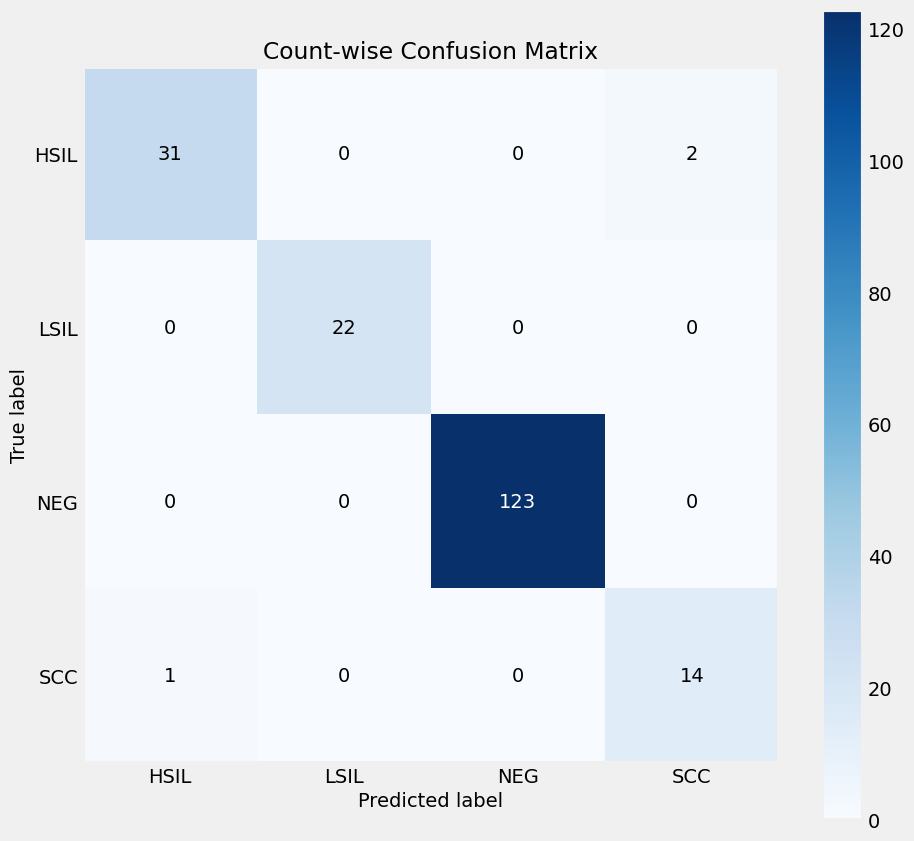

In [85]:
confusion_matrix_num(CNN_H2N, ds_tst_Og)

C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


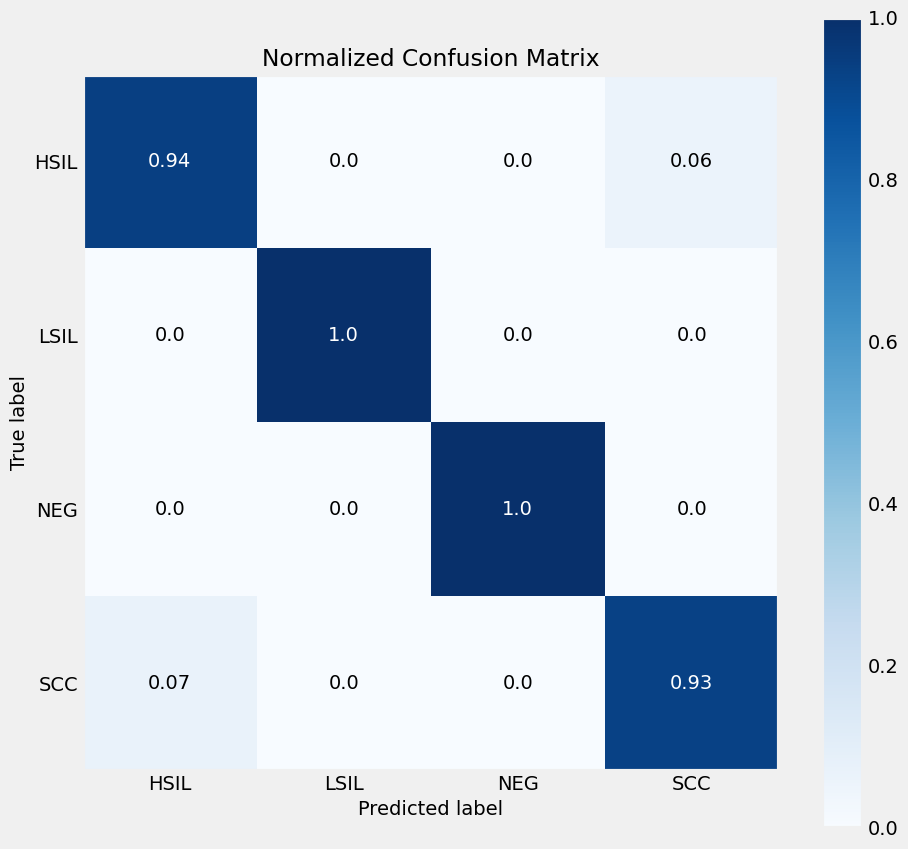

In [86]:
confusion_matrix_norm(CNN_H2N, ds_tst_Og)

## VGGNet Model

In [72]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models,optimizers, regularizers

# Define the batch size
batch_size = 64

# Define the number of classes in your dataset
num_classes = 4

# Create the VGGNet model with BatchNormalization and Dropout
def create_vgg_model(input_shape, num_classes):
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the VGG16 layers
    for layer in vgg_model.layers:
        layer.trainable = False

    model = models.Sequential()
    model.add(vgg_model)

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the VGGNet model
model_vgg = create_vgg_model(input_shape, num_classes)

In [73]:
# Compile the model
#optimizer = optimizers.Adam(learning_rate=0.001)
model_vgg.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_30 (Dense)            (None, 4096)              33558528  
                                                                 
 batch_normalization_25 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 4096)              0         
                                                                 
 dense_31 (Dense)            (None, 4096)              16781312  
                                                        

In [75]:
# Train the model
history = model_vgg.fit(
    ds_trn,
    epochs=50,
    batch_size = batch_size, 
    verbose= 1, 
    callbacks=[FinalCallBack(), EarlyStopping],
    validation_data= ds_val)

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 1.0449 - accuracy: 0.7923
****************

The average loss for epoch 1 is  1.045 and accuracy is  0.792. 

***************

59/59 [==============================] - 111s 2s/step - loss: 1.0449 - accuracy: 0.7923 - val_loss: 2.4688 - val_accuracy: 0.5587
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 0.4201 - accuracy: 0.8885
****************

The average loss for epoch 2 is  0.420 and accuracy is  0.889. 

***************

59/59 [==============================] - 107s 2s/step - loss: 0.4201 - accuracy: 0.8885 - val_loss: 0.8932 - val_accuracy: 0.7907
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 0.2451 - accuracy: 0.9221
****************

The average loss for epoch 3 is  0.245 and accuracy is  0.922. 

***************

59/59 [==============================] - 113s 2s/step - loss: 0.2451 - accuracy: 0.9221 - val_loss: 0.6225 - val_accuracy: 0.8733
Epoch 4/50
59/59 [==========

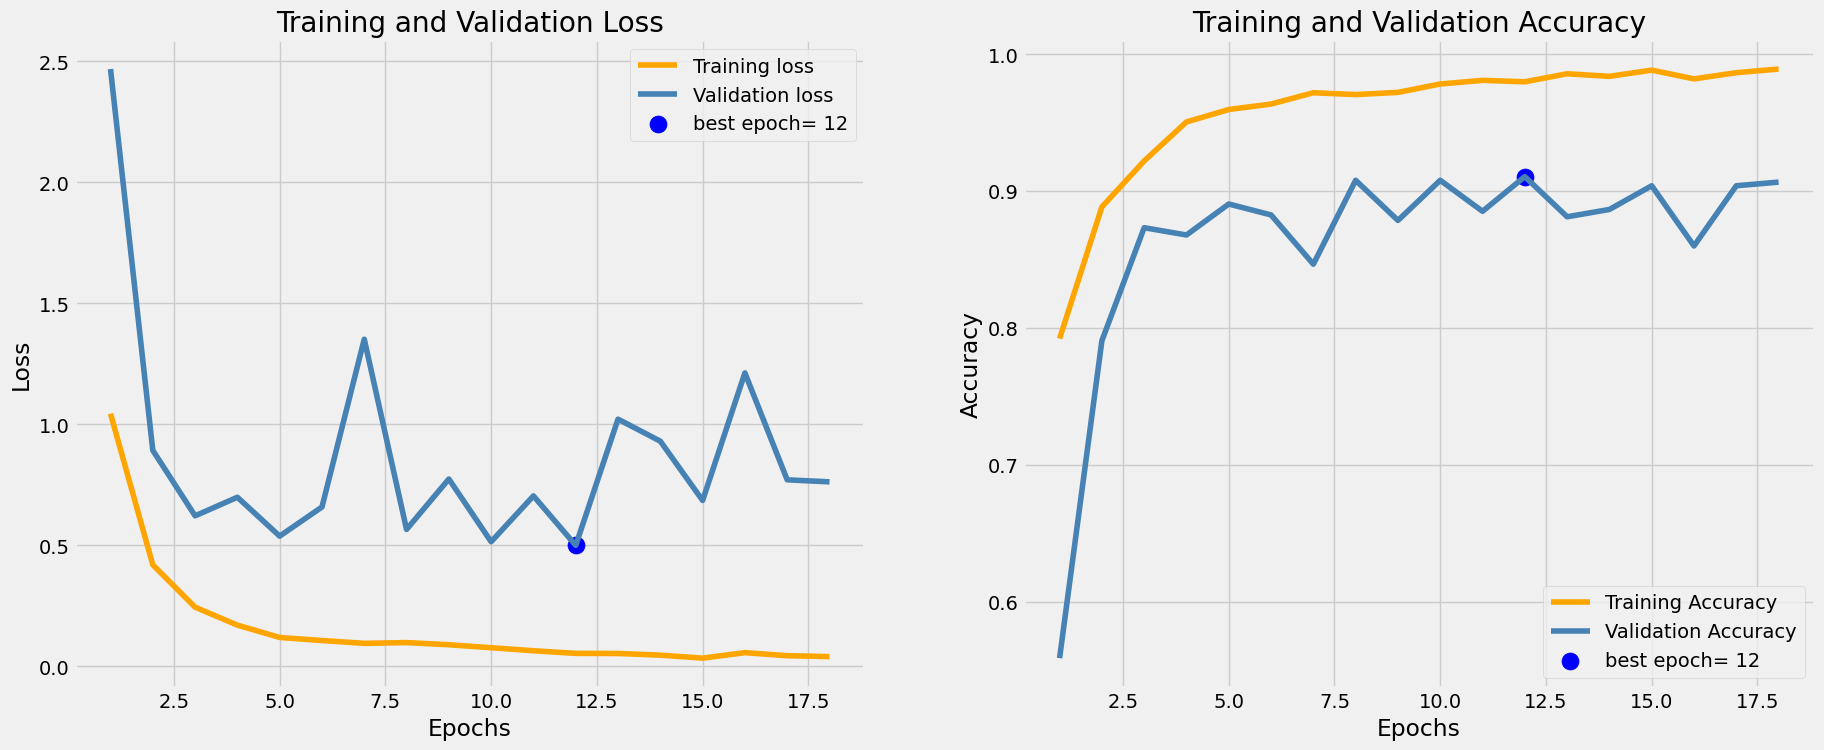

In [76]:
plot_training(history)

In [78]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_vgg.evaluate(ds_tst_Og)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for the test data
y_pred = model_vgg.predict(ds_tst_Og)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ds_trn.class_indices.keys()
print(classification_report(ds_tst_Og.classes, y_pred_classes, target_names=class_names))

4/4 [==============================] - 14s 3s/step - loss: 0.4773 - accuracy: 0.9119
Test Accuracy: 91.19%
              precision    recall  f1-score   support

        HSIL       0.81      0.67      0.73        33
        LSIL       0.96      1.00      0.98        22
         NEG       0.99      0.96      0.98       123
         SCC       0.58      0.93      0.72        15

    accuracy                           0.91       193
   macro avg       0.84      0.89      0.85       193
weighted avg       0.93      0.91      0.91       193



C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


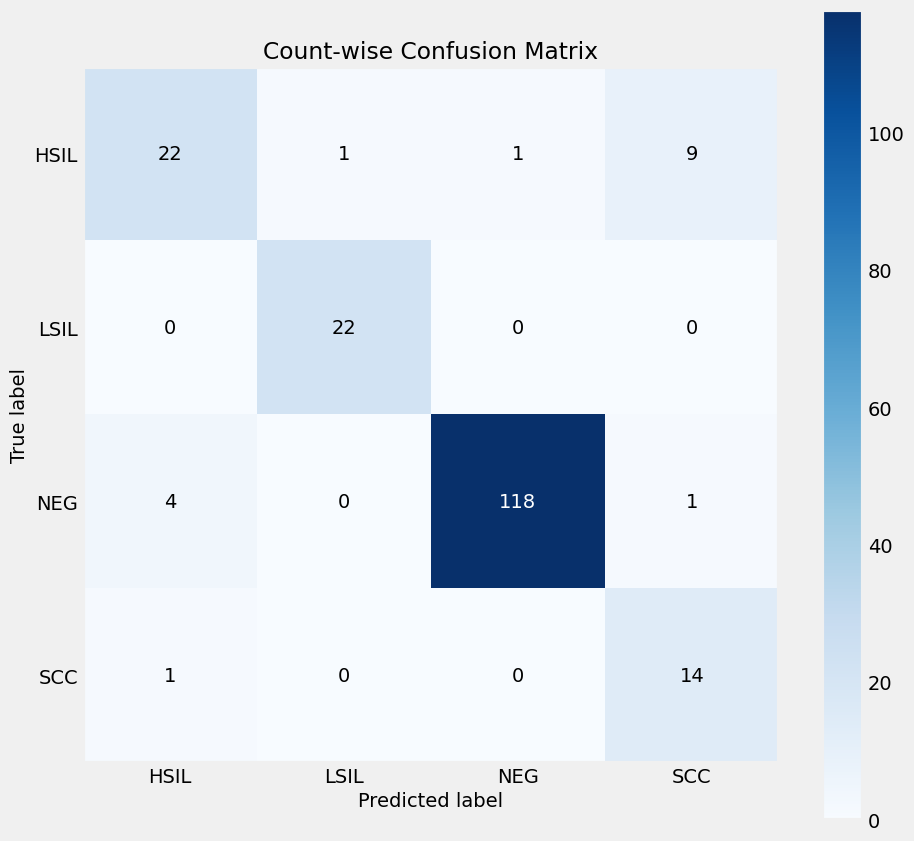

In [79]:
confusion_matrix_num(model_vgg, ds_tst_Og)

C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


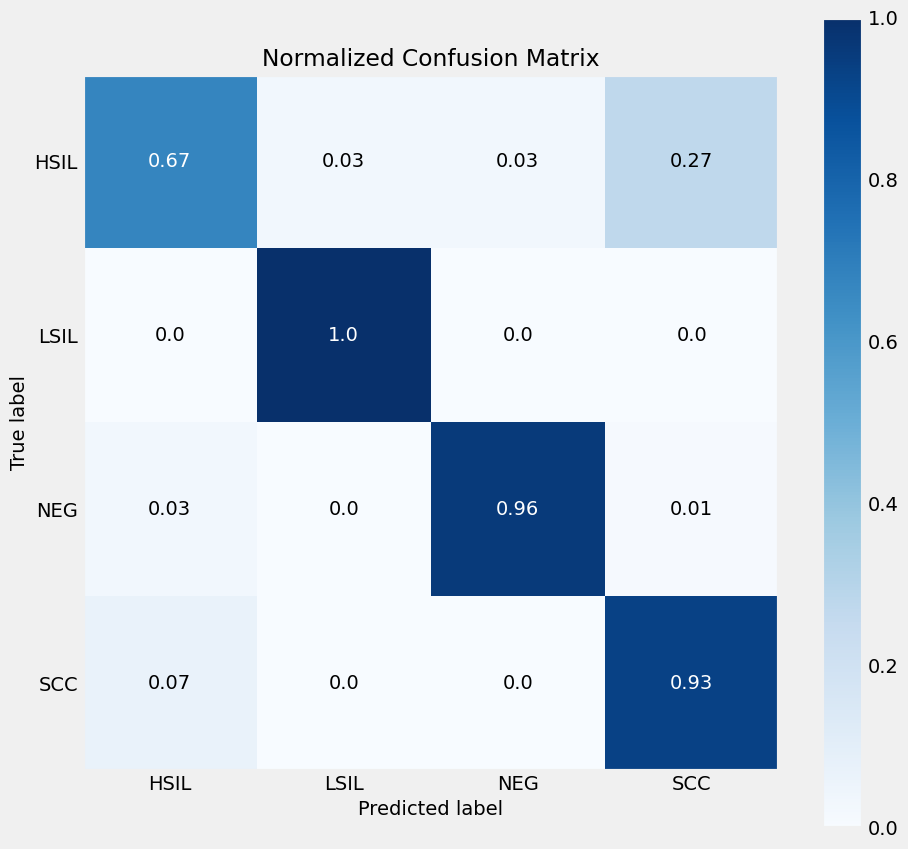

In [87]:
confusion_matrix_norm(model_vgg, ds_tst_Og)

## RESNET50

### Defining Blocks

In [126]:
def identity_block(input, filters):
  filter1, filter2, filter3 = filters
  x = tf.keras.layers.Conv2D(filter1, (1,1))(input)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.relu(x)

  x = tf.keras.layers.Conv2D(filter2, (3,3), padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.relu(x)

  x = tf.keras.layers.Conv2D(filter3, (1,1))(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.add([x, input])
  x = tf.keras.activations.relu(x)
  return x

def conv_block(input, filters, strides):
  filter1, filter2, filter3 = filters
  x = tf.keras.layers.Conv2D(filter1, (1,1), strides=strides)(input)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.relu(x)

  x = tf.keras.layers.Conv2D(filter2, (3,3), padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.relu(x)

  x = tf.keras.layers.Conv2D(filter3, (1,1))(x)
  x = tf.keras.layers.BatchNormalization()(x)

  tmp = tf.keras.layers.Conv2D(filter3, (1,1), strides=strides)(input)
  tmp = tf.keras.layers.BatchNormalization()(tmp)

  x = layers.add([x, tmp])
  x = tf.keras.activations.relu(x,return_sequences = True)
  return x


In [161]:
model_res50 = tf.keras.Sequential()

def resnet50():
    input = tf.keras.Input(shape = input_shape)
    x = tf.keras.layers.ZeroPadding2D((3,3))(input)

    x = tf.keras.layers.Conv2D(64, (7,7), strides=(2,2))(input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)

    x = conv_block(x, [64,64,256], strides=(1,1))
    x = identity_block(x, [64,64,256])
    x = identity_block(x, [64,64,256])

    x = conv_block(x, [128,128,512], strides=(2,2))
    x = identity_block(x, [128,128,512])
    x = identity_block(x, [128,128,512])
    x = identity_block(x, [128,128,512])

    x = conv_block(x, [256,256,1024], strides=(2,2))
    x = identity_block(x, [256,256,1024])
    x = identity_block(x, [256,256,1024])
    x = identity_block(x, [256,256,1024])
    x = identity_block(x, [256,256,1024])
    x = identity_block(x, [256,256,1024])

    x = conv_block(x, [512,512,2048], strides=(2,2))
    x = identity_block(x, [512,512,2048])
    x = identity_block(x, [512,512,2048])

    x = tf.keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')(x)
    x = tf.keras.layers.Flatten()(x)

    output = tf.keras.layers.Dense(4, activation='softmax')(x)
    model = tf.keras.models.Model(input, output) 
    return model

In [165]:
resNet50 = resnet50()
resNet50.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
resNet50.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_910 (Conv2D)            (None, 61, 61, 64)   9472        ['input_16[0][0]']               
                                                                                                  
 batch_normalization_915 (Batch  (None, 61, 61, 64)  256         ['conv2d_910[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [166]:
results_res50 = resNet50.fit(ds_trn,
                           epochs=30, 
                           batch_size = 64, 
                           verbose= 1, 
                           validation_data=ds_val,
                           callbacks=[FinalCallBack(), EarlyStopping]
                          )

Epoch 1/30
59/59 [==============================] - ETA: 0s - loss: 1.8671 - accuracy: 0.6632
****************

The average loss for epoch 1 is  1.867 and accuracy is  0.663. 

***************

59/59 [==============================] - 121s 2s/step - loss: 1.8671 - accuracy: 0.6632 - val_loss: 2.3804 - val_accuracy: 0.2493
Epoch 2/30
59/59 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.8077
****************

The average loss for epoch 2 is  0.695 and accuracy is  0.808. 

***************

59/59 [==============================] - 103s 2s/step - loss: 0.6953 - accuracy: 0.8077 - val_loss: 3.0588 - val_accuracy: 0.2493
Epoch 3/30
59/59 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9032
****************

The average loss for epoch 3 is  0.245 and accuracy is  0.903. 

***************

59/59 [==============================] - 103s 2s/step - loss: 0.2447 - accuracy: 0.9032 - val_loss: 2.6664 - val_accuracy: 0.3360
Epoch 4/30
59/59 [==========

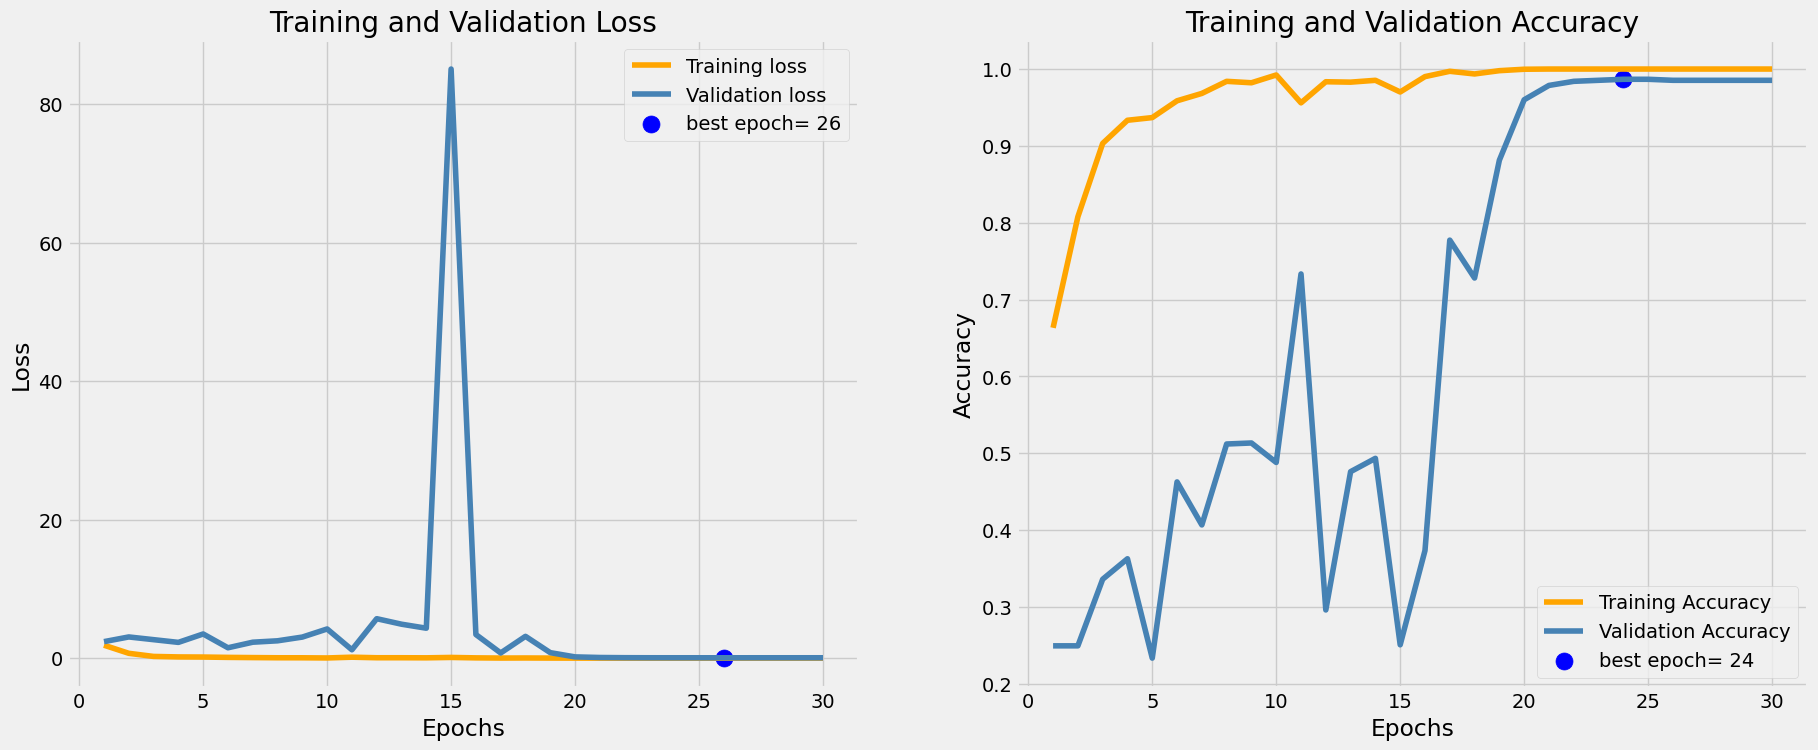

In [167]:
plot_training(results_res50)

In [172]:
# Evaluate the model on the test data
test_loss, test_accuracy = resNet50.evaluate(ds_tst_Og)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for the test data
y_pred = resNet50.predict(ds_tst_Og)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ds_trn.class_indices.keys()
print(classification_report(ds_tst_Og.classes, y_pred_classes, target_names=class_names))

4/4 [==============================] - 13s 3s/step - loss: 0.1752 - accuracy: 0.9741
Test Accuracy: 97.41%
              precision    recall  f1-score   support

        HSIL       0.91      0.94      0.93        33
        LSIL       1.00      1.00      1.00        22
         NEG       1.00      1.00      1.00       123
         SCC       0.86      0.80      0.83        15

    accuracy                           0.97       193
   macro avg       0.94      0.93      0.94       193
weighted avg       0.97      0.97      0.97       193



C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


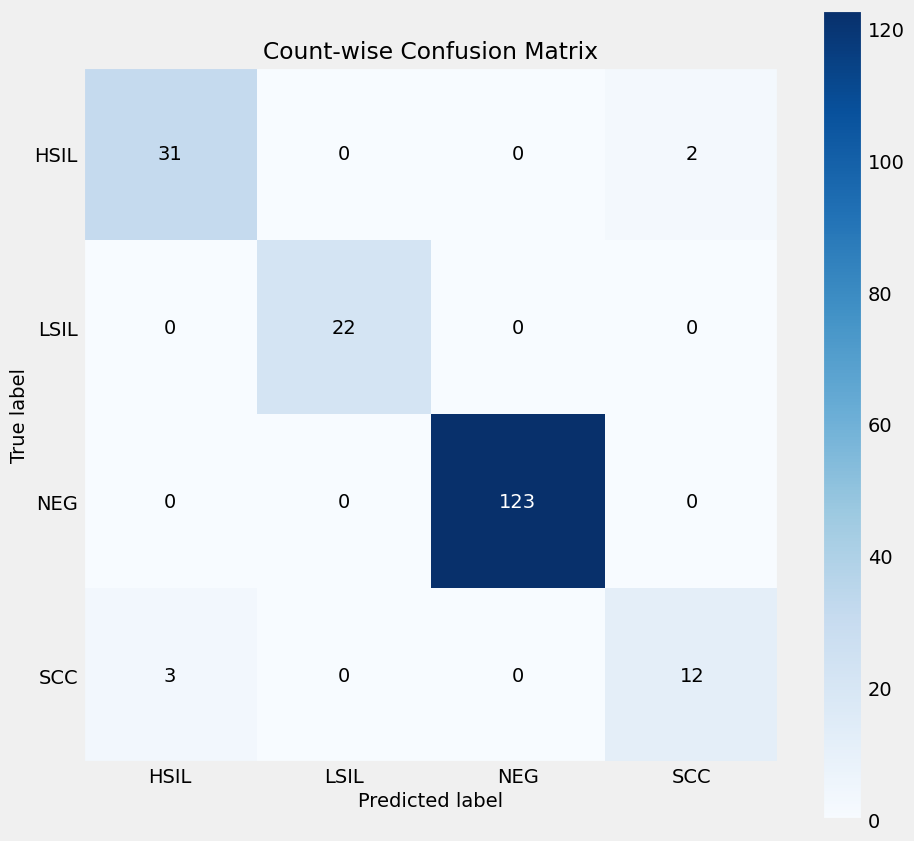

In [173]:
confusion_matrix_num(resNet50, ds_tst_Og)

C:\Users\Komal\AppData\Local\Temp\ipykernel_18088\3923782795.py:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(data)


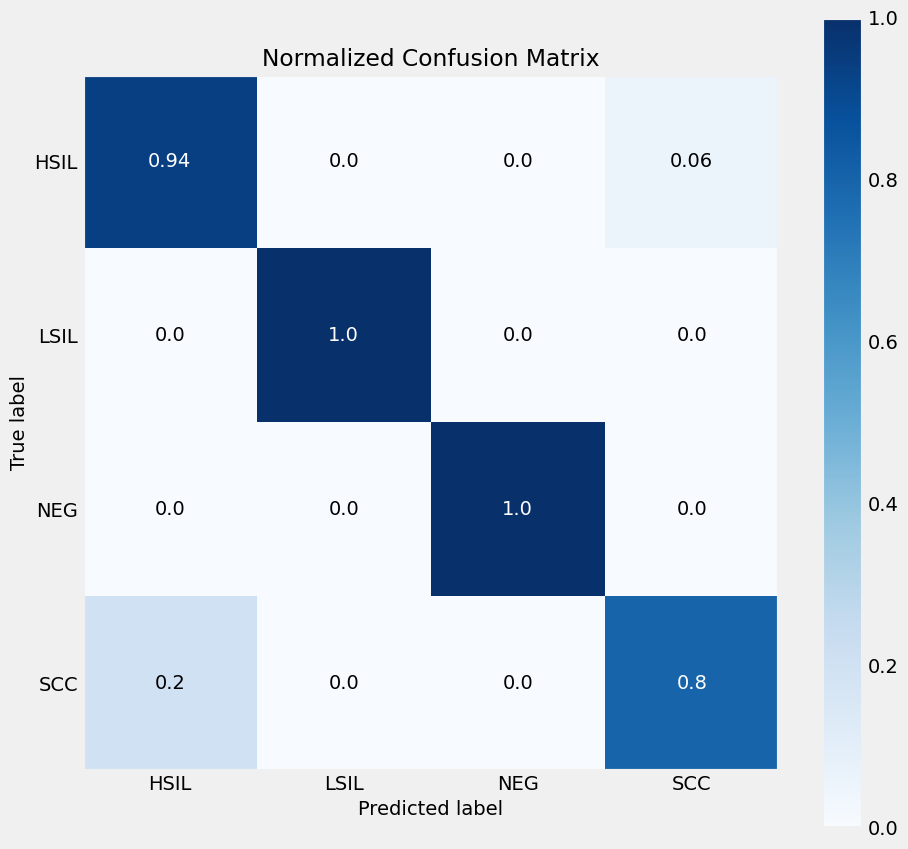

In [174]:
confusion_matrix_norm(resNet50, ds_tst_Og)